In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy

sns.set()
sns.set_style("darkgrid")
%matplotlib inline

In [10]:
DATA_DIR = "./"

## Loneliness Reported by Older Individuals

In [11]:
df_old = pd.read_csv(DATA_DIR+"older_lonliness.csv")
df_old.head()

,Entity,Code,Year,Self-reported feelings of loneliness among older adults
0,Austria,AUT,2005,46
1,Belgium,BEL,2005,42
2,Denmark,DNK,2005,25
3,England,GBR,2018,33
4,Finland,FIN,2002,39


In [12]:
df_old.describe()

,Year,Self-reported feelings of loneliness among older adults
count,15.000000,15.000000
mean,2006.533333,39.000000
std,4.718757,9.827076
min,2002.000000,25.000000
25%,2005.000000,31.500000
50%,2005.000000,39.000000
75%,2005.000000,45.500000
max,2018.000000,62.000000


In [13]:
df_old.isna().sum()

Entity                                                     0
Code                                                       0
Year                                                       0
Self-reported feelings of loneliness among older adults    0
dtype: int64

[Text(0, 0, 'Greece'),
 Text(1, 0, 'Israel'),
 Text(2, 0, 'Italy'),
 Text(3, 0, 'Austria'),
 Text(4, 0, 'France'),
 Text(5, 0, 'Belgium'),
 Text(6, 0, 'Spain'),
 Text(7, 0, 'Finland'),
 Text(8, 0, 'Germany'),
 Text(9, 0, 'Netherlands'),
 Text(10, 0, 'England'),
 Text(11, 0, 'Sweden'),
 Text(12, 0, 'United States'),
 Text(13, 0, 'Switzerland'),
 Text(14, 0, 'Denmark')]

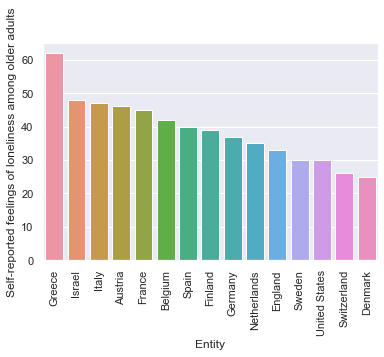

In [15]:
# appears that cleaning is not necessary, try ploting:
df_old_sorted = df_old.sort_values(by="Self-reported feelings of loneliness among older adults", ascending=False)
g1 = sns.barplot(data=df_old_sorted, x="Entity", y="Self-reported feelings of loneliness among older adults")
g1.set_xticklabels(g1.get_xticklabels(), rotation=90)

<AxesSubplot:xlabel='Self-reported feelings of loneliness among older adults', ylabel='Entity'>

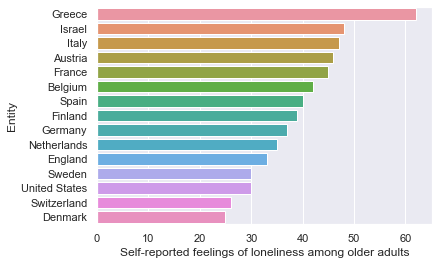

In [16]:
# Entity entries have long names, try flipping the axis
sns.barplot(data=df_old_sorted, y="Entity", x="Self-reported feelings of loneliness among older adults", orient="h")

## Job Search US 2015
Similar procedures can be performed for other countries

In [17]:
df_job = pd.read_csv("job-seeker-job-search-pew.csv")

In [18]:
df_job.head(7)

,Method,Proportion
0,Percentage who used online resources and infor...,79
1,Percentage who used employment agencies (gover...,32
2,Percentage who used ads in print publications,32
3,Percentage who used professional or work conne...,63
4,"Percentage who used job fairs, conferences, an...",28
5,Percentage who used connections with close fri...,66
6,Percentage who used acquaintances or friends-o...,55


In [19]:
df_job.describe()

,Proportion
count,7.000000
mean,50.714286
std,20.080789
min,28.000000
25%,32.000000
50%,55.000000
75%,64.500000
max,79.000000


In [11]:
df_job.isna().sum()

Method        0
Proportion    0
dtype: int64

In [20]:
# sufficiently simple & clean dataset, proceed to sorting & plotting
df_job_sorted = df_job.sort_values(by="Proportion", ascending=False)

<AxesSubplot:xlabel='Proportion', ylabel='Method'>

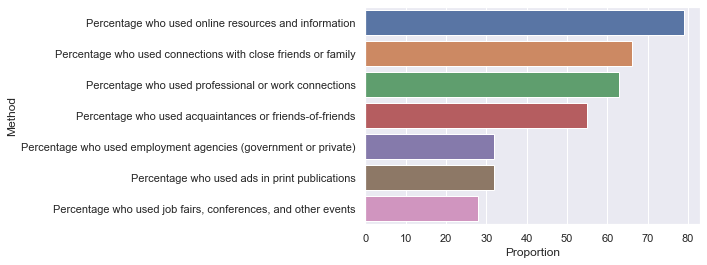

In [21]:
sns.barplot(data=df_job_sorted, x="Proportion", y="Method", orient="h")

## productivity

In [22]:
df_productivity = pd.read_csv("productivity.csv")
df_productivity.head()

,Entity,Code,Year,Productivity (PWT 9.1 (2019))
0,Argentina,ARG,1950,3.132358
1,Argentina,ARG,1951,3.153722
2,Argentina,ARG,1952,2.827533
3,Argentina,ARG,1953,2.963201
4,Argentina,ARG,1954,3.045096


In [23]:
df_productivity.describe()

,Year,Productivity (PWT 9.1 (2019))
count,3373.000000,3373.000000
mean,1989.147940,20.385341
std,18.502181,16.144944
min,1950.000000,0.581635
25%,1975.000000,7.440670
50%,1992.000000,16.455084
75%,2005.000000,29.727093
max,2017.000000,109.772140


In [24]:
df_productivity.isna().sum()

Entity                           0
Code                             0
Year                             0
Productivity (PWT 9.1 (2019))    0
dtype: int64

In [25]:
# replace the long feature name
df_productivity.rename(columns={"Productivity (PWT 9.1 (2019))": "Productivity"}, inplace=True)
df_productivity.head()

,Entity,Code,Year,Productivity
0,Argentina,ARG,1950,3.132358
1,Argentina,ARG,1951,3.153722
2,Argentina,ARG,1952,2.827533
3,Argentina,ARG,1953,2.963201
4,Argentina,ARG,1954,3.045096


In [26]:
# To visualize the dataset in a country-wise race in flourish.org,
# we need to use year as feature and productivity as values
# prep work starts here
min_year = df_productivity["Year"].min()
max_year = df_productivity["Year"].max()
print(min_year, max_year)

1950 2017


In [27]:
df_productivity["Code"].unique()

array(['ARG', 'AUS', 'AUT', 'BGD', 'BRB', 'BEL', 'BRA', 'BGR', 'KHM',
       'CAN', 'CHL', 'CHN', 'COL', 'CRI', 'HRV', 'CYP', 'CZE', 'DNK',
       'ECU', 'EST', 'FIN', 'FRA', 'DEU', 'GRC', 'HKG', 'HUN', 'ISL',
       'IND', 'IDN', 'IRL', 'ISR', 'ITA', 'JAM', 'JPN', 'LVA', 'LTU',
       'LUX', 'MYS', 'MLT', 'MEX', 'MMR', 'NLD', 'NZL', 'NGA', 'NOR',
       'PAK', 'PER', 'PHL', 'POL', 'PRT', 'ROU', 'RUS', 'LCA', 'SGP',
       'SVK', 'SVN', 'ZAF', 'KOR', 'ESP', 'LKA', 'SWE', 'CHE', 'TWN',
       'THA', 'TTO', 'TUR', 'GBR', 'USA', 'URY', 'VEN', 'VNM'],
      dtype=object)

In [28]:
# test itertuples
for row in df_productivity.itertuples():
    print(row[-2], row[-1])
    break

1950 3.1323583


In [39]:
# create transposed dataframe for flourish viz
df_prod_trans = pd.DataFrame(columns=["Entity", "Code"]+[str(year) for year in range(min_year, max_year+1)])
for cur_code in df_productivity["Code"].unique():
    cur_row = {"Code": cur_code}
    cur_df = df_productivity[df_productivity["Code"] == cur_code]
    cur_row["Entity"] = cur_df.iloc[0][0]
    for row in cur_df.itertuples():
        cur_year = str(row[-2])
        cur_productivity = row[-1]
        cur_row[cur_year] = cur_productivity
    df_prod_trans = df_prod_trans.append(cur_row, ignore_index=True)
    
df_prod_trans.head()

,Entity,Code,1950,1951,1952,1953,1954,1955,1956,1957,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Argentina,ARG,3.132358,3.153722,2.827533,2.963201,3.045096,3.210046,3.244251,3.362723,...,19.550049,18.543003,20.230000,21.449110,21.437298,21.548719,21.150030,21.299370,21.183163,21.749641
1,Australia,AUS,13.322768,12.820562,12.497678,14.030227,14.992547,15.641343,15.745474,15.792577,...,47.303570,47.501831,50.503040,52.322773,52.503056,53.549725,54.280880,51.537594,54.122646,54.590942
2,Austria,AUT,5.969629,6.162632,6.479048,6.885874,7.186485,7.525800,7.841809,8.081752,...,49.313515,48.581207,49.893505,50.874996,52.943409,52.703903,54.838917,56.620911,56.392387,57.436661
3,Bangladesh,BGD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.506240,2.650316,2.944530,3.264759,3.162133,3.360770,3.491649,3.657856,3.754542,3.973988
4,Barbados,BRB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
df_prod_trans.describe()

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
count,25.000000,28.000000,28.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,...,65.000000,65.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000
mean,7.164083,7.003300,7.220708,7.324647,7.668026,8.031511,8.285794,8.573211,8.785915,9.174633,...,30.121663,29.550698,30.832997,31.941404,32.646010,33.011171,33.348486,33.531386,33.750087,34.646334
std,4.034990,4.029012,4.088501,4.374990,4.536983,4.764615,4.889392,4.984511,5.129916,5.408320,...,20.067956,18.921720,19.783492,20.432356,20.755465,20.711942,20.489393,20.496675,20.706076,21.226185
min,2.018346,1.672915,1.829535,1.436390,1.456806,1.533823,1.538680,1.648172,1.671577,1.666843,...,1.761451,1.665147,1.731800,1.839789,1.941693,2.154728,2.162902,2.260382,2.172024,2.244142
25%,4.266608,4.170692,4.279446,3.985670,3.898234,4.017075,4.214442,4.539720,4.753748,4.953836,...,15.835861,15.435143,15.372905,16.714596,16.709572,17.168550,16.983430,17.146252,17.058077,16.934655
50%,6.633444,6.216299,6.419776,6.231276,6.867972,7.365178,7.431048,7.370864,7.502350,8.150012,...,27.551277,27.826616,28.576334,28.482712,29.305626,29.808742,29.573248,31.400841,31.117968,32.801818
75%,9.313578,9.428649,9.559416,10.025637,10.345760,10.744579,11.217801,11.658480,11.903381,12.274018,...,46.087280,44.566868,46.436723,47.050042,48.178247,47.693014,47.855872,48.565759,48.567639,49.269856
max,18.140602,18.428661,18.856224,19.512449,20.034237,20.884556,21.015562,21.663401,22.211279,23.010408,...,103.750400,89.443871,96.927681,105.885890,109.772140,107.972210,99.664436,91.498856,96.044075,99.129036


In [41]:
df_prod_trans.to_csv("productivity_transposed.csv", index=False)

In [21]:
# Static visualization for selected countries
interested_entities = ["United States", "Japan", "Zambia", "Australia", "China", "Spain", "Brazil"]
df_productivity_filtered = df_productivity[df_productivity["Entity"].isin(interested_entities)]
df_productivity_filtered.describe()

,Year,Productivity (PWT 9.1 (2019))
count,269.000000,269.000000
mean,1986.895911,23.227833
std,19.409480,17.142013
min,1950.000000,1.617420
25%,1971.000000,7.219017
50%,1988.000000,19.685320
75%,2004.000000,36.038780
max,2017.000000,65.512207


<AxesSubplot:xlabel='Year', ylabel='Productivity (PWT 9.1 (2019))'>

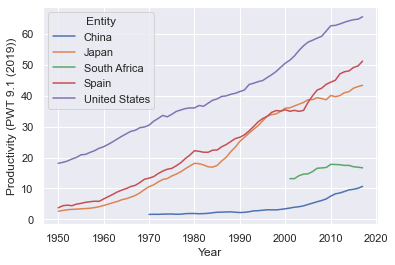

In [22]:
sns.lineplot(data=df_productivity_filtered, x="Year", y="Productivity (PWT 9.1 (2019))", hue="Entity")

## Connectiveness

In [32]:
# Facebook connectiveness dataset
df_connect = pd.read_csv("fb_connect.tsv", sep="\t")
df_connect.head()

,user_loc,fr_loc,scaled_sci
0,AE,AE,1117179
1,AE,AF,161618
2,AE,AG,5488
3,AE,AL,2101
4,AE,AM,3580


In [33]:
len(df_connect)

34596

In [34]:
df_connect.isna().sum()

user_loc      186
fr_loc        186
scaled_sci      0
dtype: int64

In [35]:
df_connect[df_connect["user_loc"].isna()]

,user_loc,fr_loc,scaled_sci
22878,NaN,AE,5605
22879,NaN,AF,1294
22880,NaN,AG,15247
22881,NaN,AL,774
22882,NaN,AM,494
...,...,...,...
23059,NaN,XK,1398
23060,NaN,YT,6990
23061,NaN,ZA,75888
23062,NaN,ZM,113449


In [36]:
# credit: https://github.com/pageflt/iso-country-codes
from iso_country_codes import CC 
print(len(CC))

249


In [37]:
# remove locations with NaN (rare entries) and rare countries not included in CC
df_connect_clean = df_connect.dropna(how="any")
country_codes = CC.keys()
df_connect_clean = df_connect_clean[df_connect_clean["user_loc"].isin(country_codes) 
                                    & df_connect_clean["fr_loc"].isin(country_codes)]
len(df_connect_clean)

33856

In [39]:
# save cleaned checkpoint
df_connect_clean.to_csv("fb_connect_clean.csv", index=False)

In [40]:
def capitalize(s):
    return s[0].upper() + s[1:].lower()

In [42]:
top_economies = ["US", "CN", "JP", "DE", "GB", 
                 "IN", "FR", "BR", "CA", "AU", 
                 "KR", "RU", "ZA", "NG", "ES"]
# df_connect_selected_1 = df_connect_clean[df_connect_clean["user_loc"].isin(top_economies)]
# df_connect_selected_1["categories"] = df_connect_selected_1["user_loc"].apply(lambda iso2:  "From " + capitalize(CC[iso2]))
# df_connect_selected_2 = df_connect_clean[df_connect_clean["fr_loc"].isin(top_economies)]
# df_connect_selected_2["categories"] = df_connect_selected_2["fr_loc"].apply(lambda iso2: "To " + capitalize(CC[iso2]))
# df_connect_selected = df_connect_selected_1.append(df_connect_selected_2, ignore_index=True).sort_values(by=["categories", "scaled_sci"], ascending=False).reset_index(drop=True)
# df_connect_selected.head()

# From & To locations are the symmetric, since facebook connections are mutual
df_connect_selected = df_connect_clean[df_connect_clean["user_loc"].isin(top_economies)]
# categories created for better flourish viz
df_connect_selected["categories"] = df_connect_selected["user_loc"].apply(lambda iso2:  capitalize(CC[iso2]))

<ipython-input-42-c59d5cf46c78>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_connect_selected["categories"] = df_connect_selected["user_loc"].apply(lambda iso2:  capitalize(CC[iso2]))


In [43]:
df_connect_selected.to_csv("fb_connect_selected.csv", index=False)

## Have Friends

In [44]:
df_friends = pd.read_csv("got_friends.csv")
df_friends.head()

,Entity,Code,Year,People who report having friends or relatives they can count on
0,Australia,AUS,2016,93.6
1,Austria,AUT,2016,91.5
2,Belgium,BEL,2016,91.7
3,Brazil,BRA,2016,90.1
4,Canada,CAN,2016,92.6


In [45]:
df_friends.describe()

,Year,People who report having friends or relatives they can count on
count,41.0,41.000000
mean,2016.0,89.797561
std,0.0,4.483385
min,2016.0,75.900000
25%,2016.0,88.300000
50%,2016.0,90.100000
75%,2016.0,92.600000
max,2016.0,98.300000


In [46]:
df_friends.isna().sum()

Entity                                                             0
Code                                                               0
Year                                                               0
People who report having friends or relatives they can count on    0
dtype: int64

In [4]:
df_friends["Year"].unique()

array([2016], dtype=int64)

<AxesSubplot:xlabel='People who report having friends or relatives they can count on', ylabel='Entity'>

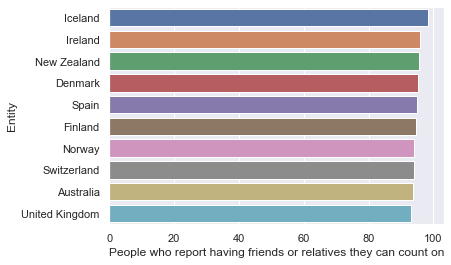

In [47]:
# sufficiently clean dataset for plotting
df_friends_sorted = df_friends.sort_values(by="People who report having friends or relatives they can count on", ascending=False)
sns.barplot(data=df_friends_sorted.head(10), x="People who report having friends or relatives they can count on", y="Entity", orient="h")

<AxesSubplot:xlabel='People who report having friends or relatives they can count on', ylabel='Entity'>

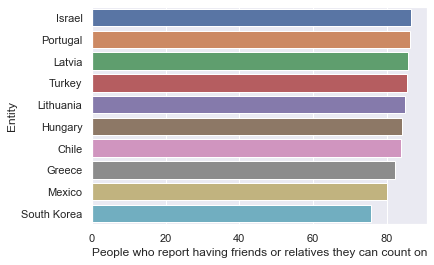

In [8]:
sns.barplot(data=df_friends_sorted.tail(10), x="People who report having friends or relatives they can count on", y="Entity", orient="h")

## One-Persn Household

In [50]:
df_one = pd.read_csv("one_person_household.csv")
df_one.head()

,Entity,Code,Year,Share of one person households,"GDP per capita, PPP (constant 2017 international $)",Population (historical estimates),Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2015,0.189425,2068.265904,34413603.0,Asia
2,Afghanistan,AFG,2002,NaN,1189.784668,22600774.0,NaN
3,Afghanistan,AFG,2003,NaN,1235.810063,23680871.0,NaN
4,Afghanistan,AFG,2004,NaN,1200.278013,24726689.0,NaN


In [51]:
df_one.columns

Index(['Entity', 'Code', 'Year', 'Share of one person households',
       'GDP per capita, PPP (constant 2017 international $)',
       'Population (historical estimates)', 'Continent'],
      dtype='object')

In [52]:
# create entity to continent map for filtering feature in viz
entity2continent = {}
for row in df_one.itertuples():
    if not pd.isnull(row[-1]):
        entity2continent[row[1]] = row[-1]

In [53]:
# surveys on single households didn't start until 1970
df_one_plot = df_one[(df_one["Year"]>1970) \
                     & (~df_one["Code"].isna()) \
                     & (~df_one["Share of one person households"].isna())].sort_values(by="Year")
df_one_plot["Continent"] = df_one_plot["Entity"].apply(lambda entity: entity2continent[entity])
# the data here will merge with world bank data preloaded in flourish studio
df_one_plot.to_csv("one_person_household_plot.csv", index=False) 

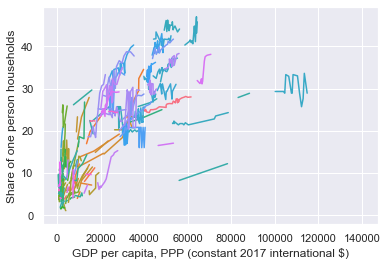

In [56]:
g_one = sns.lineplot(data=df_one_plot, x="GDP per capita, PPP (constant 2017 international $)", y="Share of one person households", hue="Entity", legend=False)

In [57]:
# messy lineplot needs further work in flourish
# TO-DO:
# log-scale x-axis, size of population representecd using filled circles, trend line